In [ ]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

Problem:-<br>
Output variable -> y<br>
y -> Whether the client has subscribed a term deposit or not <br>
Binomial ("yes" or "no")<br><br>
Attribute information For bank dataset

 Input variables:<br>
> bank client data:<br>
> 1 - age (numeric)<br>
> 2 - job : type of job (categorical : "admin." ,"unknown" ,"unemployed" ,"management" ,"housemaid" ,"entrepreneur" ,"student" ,"blue-collar" ,"self-employed" ,"retired" ,"technician" ,"services") <br>
> 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)<br>
> 4 - education (categorical: "unknown","secondary","primary","tertiary")<br>
> 5 - default: has credit in default? (binary: "yes","no")<br>
> 6 - balance: average yearly balance, in euros (numeric) <br>
> 7 - housing: has housing loan? (binary: "yes","no")<br>
> 8 - loan: has personal loan? (binary: "yes","no")<br>

> related with the last contact of the current campaign:<br>
> 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") <br>
> 10 - day: last contact day of the month (numeric)<br>
> 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")<br>
> 12 - duration: last contact duration, in seconds (numeric)<br>

>  other attributes:<br>
> 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)<br>
> 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)<br>
> 15 - previous: number of contacts performed before this campaign and for this client (numeric)<br>
> 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")<br>

> Output variable (desired target):<br>
> 17 - y - has the client subscribed a term deposit? (binary: "yes","no")<br>
> 8. Missing Attribute Values: None<br>


In [ ]:
data=pd.read_csv('bank-full.csv',sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Comment:<br>
* data doesn't contain any null value

In [ ]:
data.shape

(45211, 17)

In [ ]:
label_encoder_job=LabelEncoder()
data['job']=label_encoder_job.fit_transform(data['job'])

In [ ]:
data['job'].unique()

array([ 4,  9,  2,  1, 11,  5,  0,  7,  6, 10,  3,  8])

In [ ]:
label_encoder_job.inverse_transform(data['job'].unique())

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
label_encoder_marital=LabelEncoder()
data['marital']=label_encoder_marital.fit_transform(data['marital'])

In [ ]:
label_encoder_marital.inverse_transform(data['marital'].unique())

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
label_encoder_education=LabelEncoder()
data['education']=label_encoder_education.fit_transform(data['education'])

In [ ]:
label_encoder_education.inverse_transform(data['education'].unique())

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
label_encoder_default=LabelEncoder()
data['default']=label_encoder_default.fit_transform(data['default'])

In [ ]:
label_encoder_default.inverse_transform(data['default'].unique())

array(['no', 'yes'], dtype=object)

In [ ]:
label_encoder_housing=LabelEncoder()
data['housing']=label_encoder_housing.fit_transform(data['housing'])

In [ ]:
label_encoder_housing.inverse_transform(data['housing'].unique())

array(['yes', 'no'], dtype=object)

In [ ]:
label_encoder_loan=LabelEncoder()
data['loan']=label_encoder_loan.fit_transform(data['loan'])

In [ ]:
label_encoder_loan.inverse_transform(data['loan'].unique())

array(['no', 'yes'], dtype=object)

In [ ]:
label_encoder_contact=LabelEncoder()
data['contact']=label_encoder_contact.fit_transform(data['contact'])

In [ ]:
label_encoder_contact.inverse_transform(data['contact'].unique())

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
label_encoder_month=LabelEncoder()
data['month']=label_encoder_month.fit_transform(data['month'])

In [ ]:
label_encoder_month.inverse_transform(data['month'].unique())

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
label_encoder_poutcome=LabelEncoder()
data['poutcome']=label_encoder_poutcome.fit_transform(data['poutcome'])

In [ ]:
label_encoder_poutcome.inverse_transform(data['poutcome'].unique())

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
label_encoder_y=LabelEncoder()
data['y']=label_encoder_y.fit_transform(data['y'])

In [ ]:
label_encoder_y.inverse_transform(data['y'].unique())

array(['no', 'yes'], dtype=object)

In [ ]:
data.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
39631,21,1,2,1,0,164,0,0,0,26,8,260,1,-1,0,3,0
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0,1
42547,30,1,1,0,0,5,0,0,0,23,2,282,1,203,1,2,1
43662,80,5,1,0,0,594,0,0,1,10,8,128,2,-1,0,3,0
41494,32,4,2,2,0,2915,0,0,0,8,11,519,1,131,2,0,1


In [ ]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


In [ ]:
data.corr()['y']

age          0.025155
job          0.040438
marital      0.045588
education    0.066241
default     -0.022419
balance      0.052838
housing     -0.139173
loan        -0.068185
contact     -0.148395
day         -0.028348
month       -0.024471
duration     0.394521
campaign    -0.073172
pdays        0.103621
previous     0.093236
poutcome    -0.077840
y            1.000000
Name: y, dtype: float64

Comment:<br>
Correaltion of columns with respect to y:-<br>


Relationship between correlation and feature importance-<br>
* When a feature has a high positive correlation with the target variable, it is likely to be considered important in predicting the target.
* Conversely, a feature with a high negative correlation with the target variable can also be considered important
* Features with weak or no correlation with the target variable may be considered less important in logistic regression. When the correlation is close to zero


---



duration     0.394521<br>
pdays        0.103621<br>
previous     0.093236<br>
education    0.066241<br>
balance      0.052838<br>
marital      0.045588<br>
job          0.040438<br>
age          0.025155<br>



---





contact     -0.148395<br>
housing     -0.139173<br>
poutcome    -0.077840<br>
campaign    -0.073172<br>
loan        -0.068185<br>
day         -0.028348<br>
month       -0.024471<br>
default     -0.022419<br>

<Axes: >

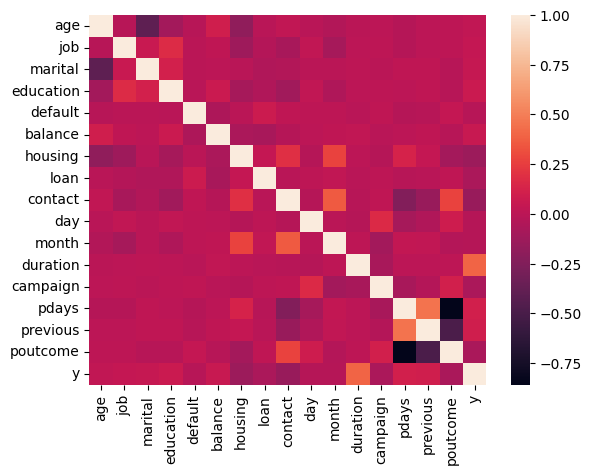

In [ ]:
sns.heatmap(data.corr())

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
data.shape

(45211, 17)

In [ ]:
#feature columns in the data

features=data.iloc[:,0:16]
#features

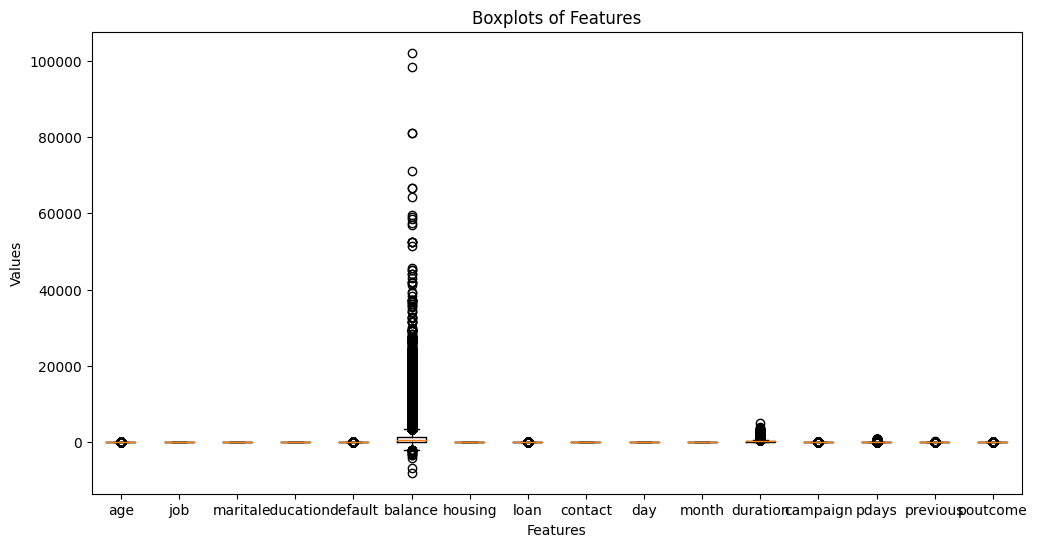

In [ ]:
# Create boxplots for each feature in 'features'
plt.figure(figsize=(12,6))
plt.boxplot(features.values)  # .values is used to convert the DataFrame to a numpy array

# Set labels for the x-axis ticks
plt.xticks(range(1, len(features.columns) + 1), features.columns)


# Add labels and a title
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Features')

# Show the plot
plt.show()


In [ ]:
#sns.pairplot(features)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(features,data['y'],test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(36168, 16)
(9043, 16)
(36168,)
(9043,)


## Model Building

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred=model.predict(x_test)

In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8711
           1       0.17      0.54      0.26       332

    accuracy                           0.89      9043
   macro avg       0.58      0.72      0.60      9043
weighted avg       0.95      0.89      0.91      9043



Comment:<br>
* Data is imbalance ,Therefore we will check for f1-score.
* f1-score for minority class is just 26%
* Model needs improvement

In [ ]:
model.score(x_train,y_train)

0.8881884538818845

In [ ]:
model.score(x_test,y_test)

0.8866526595156474

In [ ]:
#model is best fit niether overfitting nor underfitting problem

In [ ]:
# Confusion Matrix for the model accuracy

confusion_matrix = confusion_matrix(y_test,pred)
print(confusion_matrix)

[[7840  154]
 [ 871  178]]


## Feature interaction

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Initialize an empty DataFrame to store interaction terms
interaction_df = pd.DataFrame()

# List of features for which you want to create interactions
features_to_interact =['age', 'job', 'marital', 'education', 'default', 'balance',
                       'housing', 'loan', 'contact', 'day', 'month', 'duration',
                       'campaign', 'pdays','previous', 'poutcome']

# Loop through all pairs of features and create interaction terms
for i in range(len(features_to_interact)):
    for j in range(i + 1, len(features_to_interact)):
        feature1_name = features_to_interact[i]
        feature2_name = features_to_interact[j]
        interaction_name = f'{feature1_name}_x_{feature2_name}'

        # Create the interaction term by multiplying the two features
        interaction_df[interaction_name] = data[feature1_name] * data[feature2_name]

# Combine the original DataFrame with the interaction terms
df = pd.concat([data, interaction_df], axis=1)

# Now df contains the original features and their interaction terms


In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration_x_campaign,duration_x_pdays,duration_x_previous,duration_x_poutcome,campaign_x_pdays,campaign_x_previous,campaign_x_poutcome,pdays_x_previous,pdays_x_poutcome,previous_x_poutcome
0,58,4,1,2,0,2143,1,0,2,5,...,261,-261,0,783,-1,0,3,0,-3,0
1,44,9,2,1,0,29,1,0,2,5,...,151,-151,0,453,-1,0,3,0,-3,0
2,33,2,1,1,0,2,1,1,2,5,...,76,-76,0,228,-1,0,3,0,-3,0
3,47,1,1,3,0,1506,1,0,2,5,...,92,-92,0,276,-1,0,3,0,-3,0
4,33,11,2,3,0,1,0,0,2,5,...,198,-198,0,594,-1,0,3,0,-3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,...,2931,-977,0,2931,-3,0,9,0,-3,0
45207,71,5,0,0,0,1729,0,0,0,17,...,912,-456,0,1368,-2,0,6,0,-3,0
45208,72,5,1,1,0,5715,0,0,0,17,...,5635,207368,3381,2254,920,15,10,552,368,6
45209,57,1,1,1,0,668,0,0,1,17,...,2032,-508,0,1524,-4,0,12,0,-3,0


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day',
       ...
       'duration_x_campaign', 'duration_x_pdays', 'duration_x_previous',
       'duration_x_poutcome', 'campaign_x_pdays', 'campaign_x_previous',
       'campaign_x_poutcome', 'pdays_x_previous', 'pdays_x_poutcome',
       'previous_x_poutcome'],
      dtype='object', length=137)

In [ ]:
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration_x_campaign,duration_x_pdays,duration_x_previous,duration_x_poutcome,campaign_x_pdays,campaign_x_previous,campaign_x_poutcome,pdays_x_previous,pdays_x_poutcome,previous_x_poutcome
32298,24,8,1,3,0,146,0,0,0,16,...,176,-176,0,528,-1,0,3,0,-3,0
13223,25,1,2,1,0,0,0,0,1,8,...,112,-112,0,336,-1,0,3,0,-3,0
31971,38,0,0,1,0,3834,1,0,0,13,...,726,118701,363,0,654,2,0,327,0,0
27077,38,9,0,1,0,8,0,0,0,21,...,181,-181,0,543,-1,0,3,0,-3,0
1642,35,4,1,2,0,4286,1,0,2,9,...,357,-357,0,1071,-1,0,3,0,-3,0


In [ ]:
data.shape

(45211, 17)

In [ ]:
df.shape

(45211, 137)

In [ ]:
#


#multicollinearity and feature selection??????????



#

### New Model Building

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(df,data['y'],test_size=0.2,random_state=10)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

In [ ]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(36168, 137)
(9043, 137)
(36168,)
(9043,)


In [ ]:
model1=LogisticRegression()
model1.fit(x_train1,y_train1)

LogisticRegression()

In [ ]:
pred1=model1.predict(x_test1)

In [ ]:
print(classification_report(pred1,y_test1))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8703
           1       0.12      0.36      0.18       340

    accuracy                           0.87      9043
   macro avg       0.54      0.63      0.55      9043
weighted avg       0.94      0.87      0.90      9043



### Using SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is a technique for oversampling the minority class in imbalanced datasets

In [ ]:

from imblearn.over_sampling import SMOTE

# Create an instance of the SMOTE class
smote = SMOTE(sampling_strategy='auto', random_state=10)

# Apply SMOTE to the training data
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)


In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_resampled.shape)
print(y_resampled.shape)

(36168, 16)
(36168,)
(63856, 16)
(63856,)


In [ ]:
# Create and train a logistic regression model
model1 = LogisticRegression()
model1.fit(x_resampled, y_resampled)

LogisticRegression()

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      6926
           1       0.69      0.34      0.45      2117

    accuracy                           0.81      9043
   macro avg       0.76      0.65      0.67      9043
weighted avg       0.79      0.81      0.78      9043



In [ ]:
model1.score(x_train,y_train)

0.8065693430656934

In [ ]:
model1.score(x_test,y_test)

0.8089129713590623

In [ ]:
#best fit model

In [ ]:
feature_importances = model1.coef_[0]
feature_importances

array([-2.11141895e-03,  5.30370023e-02, -1.43711717e-01, -7.93876934e-02,
       -1.15383023e-02,  5.34172186e-05, -3.61716269e-01, -1.16566596e-01,
       -3.66293960e-01, -3.05971005e-03, -6.11420753e-02,  5.69579744e-03,
       -4.92448916e-01, -1.62748333e-04,  1.72922301e-01, -1.52313933e-01])

In [ ]:
#To determine the feature importance
#The coefficient values associated with each feature in the logistic regression model indicate the importance of that feature.

coefficients=model.coef_[0]

# Display the feature importance
feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous','poutcome']
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

print("Feature Importance:")
print(feature_importance)


Feature Importance:
      Feature  Coefficient
14   previous     0.122359
1         job     0.016276
11   duration     0.003430
5     balance     0.000026
13      pdays    -0.002003
4     default    -0.007389
3   education    -0.011293
9         day    -0.018435
0         age    -0.022657
10      month    -0.024227
7        loan    -0.080161
2     marital    -0.123847
15   poutcome    -0.243744
8     contact    -0.263673
6     housing    -0.265150
12   campaign    -0.320401


In [ ]:
model.intercept_

array([-0.09906883])

In [ ]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
data.drop(columns=['contact','housing','campaign'],inplace=True)

In [ ]:
data

,age,job,marital,education,default,balance,loan,day,month,duration,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,0,5,8,261,-1,0,3,0
1,44,9,2,1,0,29,0,5,8,151,-1,0,3,0
2,33,2,1,1,0,2,1,5,8,76,-1,0,3,0
3,47,1,1,3,0,1506,0,5,8,92,-1,0,3,0
4,33,11,2,3,0,1,0,5,8,198,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,17,9,977,-1,0,3,1
45207,71,5,0,0,0,1729,0,17,9,456,-1,0,3,1
45208,72,5,1,1,0,5715,0,17,9,1127,184,3,2,1
45209,57,1,1,1,0,668,0,17,9,508,-1,0,3,0


In [ ]:
x=data.iloc[:,0:13]
y=data['y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
print(classification_report(pred1,y_test))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8711
           1       0.16      0.51      0.24       332

    accuracy                           0.88      9043
   macro avg       0.57      0.70      0.59      9043
weighted avg       0.95      0.88      0.91      9043



## ROC (Receiver Operating Characteristic)
Plotting an ROC curve is a common technique used to evaluate the performance of binary classification models, including logistic regression. The ROC curve illustrates the trade-off between the true positive rate (sensitivity) and the false positive rate (1-specificity) for different threshold values

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.02014011 1.        ]
[0.         0.16873213 1.        ]
[2 1 0]


In [ ]:
# Calculate the AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, pred)
roc_auc

0.5742960103776592

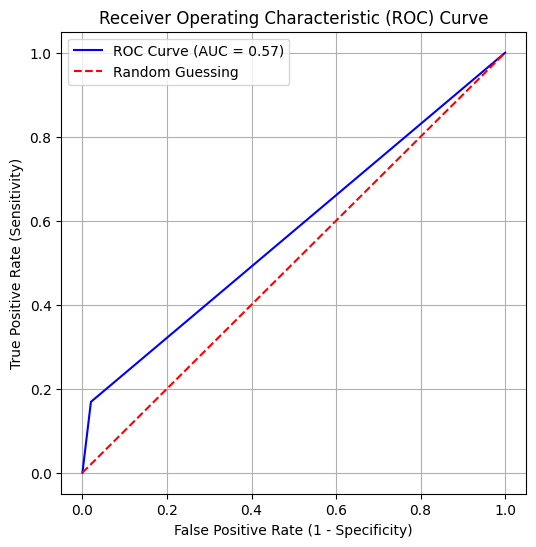

In [ ]:
# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc), color='b')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend()
plt.grid(True)
plt.show()


## Sigmoid Curve

The sigmoid curve, also known as the sigmoid function or S-shaped curve, is a mathematical curve that resembles the letter "S" in shape. It is a type of logistic function and is commonly represented by the following equation:<br>
σ(z)= 1/1+e ^(-z)<br>
In this equation:<br>

* $σ(z)$ is the output of the sigmoid function, which is a real number between 0 and 1.
* $z$ is the input to the function, which can be any real number

The sigmoid function maps any real-valued number $z$ to a value in the range [0, 1]. <br>
The curve starts near 0 for very negative values of $z$,
rises steeply in the middle region as $z$ approaches 0, and approaches 1 as $z$ becomes very positive.

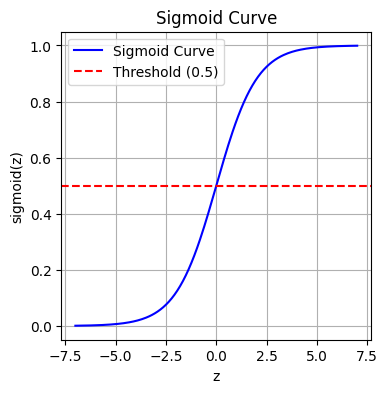

In [ ]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate a range of input values (z)
z = np.linspace(-7, 7, 200)  # Values from -7 to 7, 200 points

# Calculate the sigmoid values for the input range
sigmoid_values = sigmoid(z)

# Plot the sigmoid curve
plt.figure(figsize=(4, 4))
plt.plot(z, sigmoid_values, label='Sigmoid Curve', color='b')
plt.title('Sigmoid Curve')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.axhline(y=0.5, color='r', linestyle='--', label='Threshold (0.5)')
plt.legend()
plt.grid(True)
plt.show()
